In [1]:
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('emoji_sentiment_tweets.csv.gz', compression='gzip')

df.head(5)

,TIME POSTED,RETWEET,emoji,score,😭,❤️,😅,💪,😁,🇺🇦,👏,🙄,🥵,🔥,🌶,😂,👍,🙏,😘,😍,🤣,😉,🔴,🤔,💕,☺️,©,🎉,😊,🤩,💫,😻,💙,🍑,🇵🇹,💖,♥️,🙏🏽,💯,😆,👀,😜,😏,[,],',❤,️,🇺,🇦,",",,☺,🇵,🇹,♥,🏽,🏾,💡,🌈,💴,🇨,🦃,🍆,💦,👄,🤒,🤲,😳,🤨,😵,😫,😪,🥔,🇸,🤍,🥺,🎥,😞,💔,💞,💀,🎨,💌,⏱,➡,🙌,🏻,📞,🏴,👯,\,u,2,0,d,♀,🚨,🌼,🌊,😢,🙂,😱,😡,🪔,⚖,🚀,👑,👇,🏼,🐶,✨,🦋,💋,🇻,😒,✋,✊,🏿,🍰,🤷,🥰,✅,♻,📈,🟩,🇬,🇭,🌍,🚩,😈,🔞,👌,🔁,🧁,🍧,💗,💘,💓,🏆,✈,🤫,⛈,🆕,🎁,👉,😤,🤪,🇳,🐝,😴,📸,🐰,🔪,📧,📰,🐍,🍭,💐,✌,🎧,💎,🎙,📄,⏰,🐯,🎈,😌,😐,🧚,💃,💨,🦒,💥,🥥,🔗,💰,💛,✝,🥀,🩸,📖,🏡,🇿,⚒,📌,😛,🇧,🇷,🔃,🥴,🎟,💻,🥳,👥,🍀,❄,🌐,🔵,👊,📆,💜,😎,🖊,🎩,🐱,🎶,🤝,🤤,💿,☠,🥅,🗳,🖥,😩,👈,💊,😖,🤦,⬇,🔄,🇲,‼,👧,🦵,😧,📋,🇪,⚠,🤞,🧐,🌺,🆓,📅,🏷,🐽,🧡,🖇,🧸,🤯,🧛,♂,📣,☑,😋,🍊,🗨,🎬,🕺,😝,📲,🌸,💝,🤭,🖱,❗,✔,🕸,📛,👨,🚒,🎆,📏,🇮,✍,📝,🥊,🌹,🕯,👸,🕳,👅,🍒,🔂,🍳,1,⃣,3,4,🎯,📽,🔌,🙃,🔮,🙆,📺,😠,🙈,⚽,😃,🐮,🤟,🍄,😹,😇,💚,🔅,☕,🍁,🏀,👻,🍓,⤵,🇫,🇴,🇱,🇼,🥇,👆,😽,🐎,🤗,👿,💼,📷,🍎,🖼,🎫,🌌,📩,🗣,📚,⏩,⏪,😲,📦,👾,😬,👣,☀,👼,🤑,🍉,🥂,📹,☝,🌟,😀,🎃,💸,🗓,🕤,⁉,🤘,🤡,🦊,🙁,🦁,🇰,🕊,🖕,🚚,💵,🎇,🚔,☎,🌞,👬,😄,❌,🔔,⚔,🌙,👪,🙋,🔻,🎵,⭐,🔒,♾,📢,⚡,⬅,✂,💭,👩,➖,✳,▶,💄,😷,🧊,🇩,5,📊,😟,🧜,➰,💣,🍫,🌻,😨,🐜,🍽,🕑,❓,🐉,🎂,🎊,🕕,🛒,🐾,🖤,🍝,🛍,😗,🐞,🐿,🐹,👵,🔉,👂,👤,🕵,⬆,🐢,⏳,🔝,⚫,🔓,⏲,🦶,👎,🐣,🗽,🥁,🤰,👋,🤮,☘,🔜,🕓,❔,😚,🏳,🥑,🐷,🤓,🐼,📨,🤥,😙,🎮,🔎,🏕,🧠,🌿,😯,🌷,👠,🎅,🆘,◀,📍,🔊,🌎,⛳,🐦,👽,✉,☄,🏫,✏,☮,🏠,8,🐐,🏃,♦,🤠,🐲,🍣,💍,♠,📭,💩,💬,🧩,🧵,❣,💮,⛓,💶,🎸,🦠,🕘,🚗,🇾,💽,💟,🦅,🏅,🐻,💅,🍯,🏋,🐠,🎤,🛸,📬,🖖,☁,🍻,👙,➕,📡,🏈,💁,🤳,🍂,🐏,📿,🎀,😔,🌽,🚪,👷,🛑,😿,⛷,🌳,😓,🕉,🦕,🔳,🐴,🛠,⛱,🏐,🐳,👹,🤐,🏙,🌕,🛌,🏭,↘,↙,🖋,🇽,🦞,😼,👘,🌱,🌚,💢,🍵,🔫,🧼,🍩,🎐,🥘,🍕,💳,▫,😣,🔢,🤖,🐌,🤼,🕷,🌪,🍪,🕖,🐟,🏔,🤎,🐇,👮,👱,🌏,🎾,😕,😥,👁,🔘,🥃,👶,🍼,🏟,🕦,🕗,🔨,🕒,⛰,🔙,🥱,🤏,🐕,🦷,🦎,🛀,👐,🏚,🚂,🏗,🤢,↪,☹,➿,🆔,📜,📥,🕰,🦔,🐈,🍾,↗,💤,🐥,🍋,🚹,🔹,🩹,🎞,📱,👕,🌡,🌛,🌜,🚫,🦛,🤴,⚰,🥼,🤱,🤧,🌬,⚕,🐺,👴,👦,🏥,⚙,▪,🤙,🍃,🚣,🤬,📀,🚿,🧍,🤶,🏹,🆚,🌋,🖐,🅰,⏯,🦩,📶,🍌,🚕,💧,🃏,🍜,🍱,🎹,🧑,🧙,🚶,🟡,🧽,😸,🦨,🔏,🏎,😮,🎭,🔐,🔷,🎦,🗝,🔛,🐑,🏵,👓,ℹ,🧨,🔽,🔀,🔆,9,🦙,🐀,🪂,🚞,🐘,🐛,🙀,🦄,🔸,🌀,😑,🐙,👺,🗯,🦂,🔑,⏬,😰,🎄,🧭,🚬,⏫,🛏,🤹,🛎,👫,🥐,🍿,🦌,🕶,🍗,🚴,⚜,🗞,🇯,🥶,🦇,🐸,🐂,🌦,🍬,🎰,🌾,🏩,🌧,🦢,📙,✖,📁,🔟,🧘,🌵,🧤,👭,🦀,🌝,🚙,🥒,🗡,😦,🧱,✡,🌅,🥤,🚲,🟥,🟧,🟨,🟦,🟪,🐤,🎼,🍛,🌃,🦸,🤸,🏝,🏖,🏞,🤜,🇶,🔬,🐨,🏁,🕔,🛬,🙇,⌨,🐭,🍢,💒,🥮,🎛,👰,🎠,🐪,🌩,🚭,🚑,🆙,👗,🧝,™,🍸,📯,🚮,🧢,🧿,🥩,🔧,👚,🍞,❎,👖,🌠,↩,➗,🌲,📎,🥕,🍅,🧃,🍡,🚸,🔱,👒,💇,💉,🥝,🥦,🍈,🌴,🚻,🧾,🙅,🏦,🧹,🧬,🧒,🐊,🏉,⛅,🥜,🍷,🍇,🥈,🧪,↔,6,🚍,🥎,👔,🧗,🚉,📻,🥗,🥓,⚓,💷,🍍,🛥,📉,💠,🎓,📤,🌄,📕,🛳,🍺,🦆,🌑,⤴,🎴,🎖,📒,🦉,〰,🛐,🐆,📂,🟢,🛰,🏓,📮,🧶,*,🌰,⛏,👟,🐒,🛢,🧕,😺,🍴,🦏,🔚,🪐,🧳,🖌,🔰,⏭,⛑,🚛,♣,💑,👞,🦍,🤿,🧟,😾,🍐,📐,🍙,🥢,🛁,🙊,🖍,🕛,🦴,😶,🚌,🛴,⚪,♨,🥚,🧥,🐋,📼,🚢,🎱,🧲,🏍,🏑,🌥,🗒,🏒,🐧,📘,🦈,💲,🪓,🐚,🐬,🦜,📑,🔺,🍦,🏘,🚓,🌮,🙉,🍏,🛹,🟣,🤚,🧀,⭕,🎲,🦪,🧏,🧅,☔,🔍,💈,🥨,📔,🕌,♟,⌚,📪,🛵,🥛,🏰,☢,🔋,🚃,🧰,⛴,🗺,🐃,🎺,🐔,💆,🐫,🛡,💱,🗑,🦹,🤕,7,🔭,#,🥧,🚘,🚽,🚐,🎳,🍤,🌒,🍶,🦰,🦑,🥞,🪀,🐖,🔈,Ⓜ,⛔,🌭,🛋,⌛,🤛,🙎,👃,🌤,🏄,🗿,🦖,🔖,🚊,🚦,🛫,🪑,☂,🦮,🦐,🧦,🗂,🔼,🕹,🐄,⏮,🦦,🏨,🏌,🍠,🏜,⚗,💏,🔦,🌉
0,"October 13, 2020 21:08:51",happening tooooo long it's worse fellow African countries contribute atrocities #GENOCIDEINCONGO,[],-0.005328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005328,-0.005328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [2]:
emojis = list(df.columns[4:])
descriptions = df[df.columns[4:]].describe()
descriptions = descriptions.transpose()
descriptions = descriptions.dropna()
remove_rows = ["]", "[", "'"]
for i in remove_rows:
    descriptions = descriptions.drop(index=i)
    
descriptions = descriptions[~(descriptions['count'] <= 200)]  
   

In [3]:
# descriptions
descriptions.sort_values(by='count', ascending=False)


,count,mean,std,min,25%,50%,75%,max
😂,101947.0,0.000326,2.937964e-03,-0.054222,0.000000,0.000000,0.001374,0.046244
,79818.0,0.002093,4.337387e-03,-0.046747,0.000000,0.000818,0.003715,0.032560
",",79818.0,0.002093,4.337387e-03,-0.046747,0.000000,0.000818,0.003715,0.032560
️,61194.0,0.001783,3.810180e-03,-0.049325,0.000000,0.000619,0.003228,0.046244
😭,52995.0,-0.000090,4.057397e-03,-0.044398,-0.002308,0.000000,0.001138,0.046244
❤,46516.0,0.001835,3.879965e-03,-0.049325,0.000000,0.000631,0.003316,0.046244
🔥,38419.0,0.001487,3.504136e-03,-0.034715,0.000000,0.000709,0.003236,0.035813
❤️,30882.0,0.002728,4.476105e-03,-0.049325,0.000584,0.002164,0.004853,0.046244
🤣,24749.0,0.002018,4.321778e-03,-0.053859,-0.000002,0.000000,0.006001,0.025591
😍,23065.0,0.001788,3.944099e-03,-0.100259,0.000000,0.000294,0.002769,0.046244


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128170 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 129397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128077 missing from current font.
  fon

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127774 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 10060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128226 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127465 missing from current font.
  font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 129309 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 129316 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128072 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128260 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127474 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127466 missing from current font.
  font.set_text

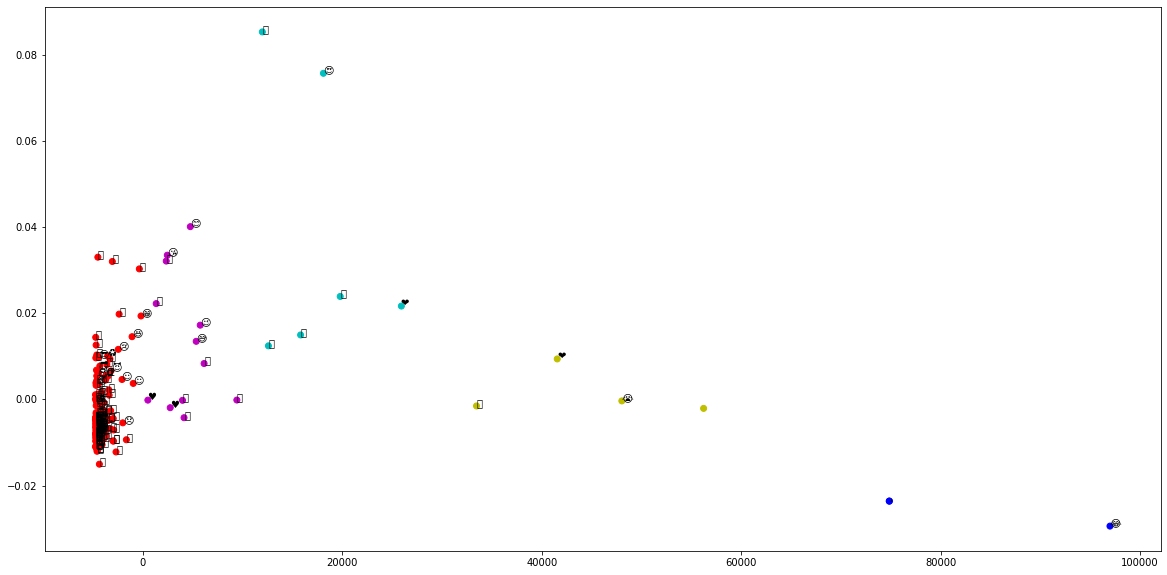

In [4]:
colors = ["r", "b", "c", "y", "m" ]
kmeans = KMeans(n_clusters = len(colors), init = 'k-means++', random_state = 0)
kmean_indices = kmeans.fit_predict(descriptions)


pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(descriptions)


x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])
for i, txt in enumerate(list(descriptions.index)):
    ax.annotate(txt, (x_axis[i], y_axis[i]))